# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     731.5
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           8.34e-39
Time:                        09:15:54   Log-Likelihood:                -4.9542
No. Observations:                  50   AIC:                             17.91
Df Residuals:                      46   BIC:                             25.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9794      0.095     52.448      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.4934394   4.98450892  5.43415542  5.81317475  6.10290236  6.29827988
  6.40868618  6.45639642  6.47292238  6.49383506  6.55292056  6.67662905
  6.87972914  7.16288139  7.5125298   7.90312903  8.30134144  8.67151431
  8.98153757  9.2081193   9.34061261  9.38276484  9.3521019   9.2770488
  9.19225954  9.13292351  9.128984    9.20021858  9.35298973  9.57919948
  9.8576199  10.15738076 10.44304147 10.68041382 10.84217903 10.91237614
 10.88902437 10.78444853 10.6232541  10.43828462 10.26522559 10.13674145
 10.07710889 10.09822825 10.19766838 10.359066   10.55481418 10.75059811
 10.91103284 11.00547702]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.00173603 10.85749243 10.59376081 10.25843079  9.91454192  9.62484948
  9.43645971  9.36929661  9.41122386  9.52101617]


## Plot comparison

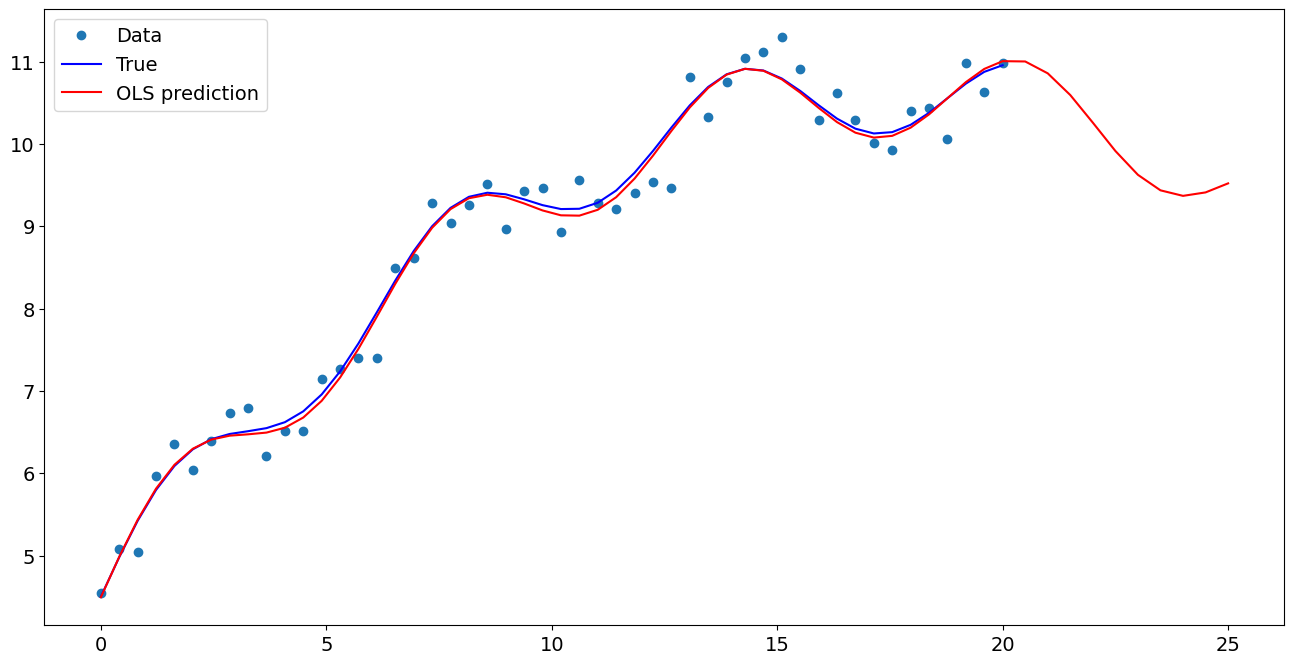

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.979445
x1                  0.495543
np.sin(x1)          0.535865
I((x1 - 5) ** 2)   -0.019440
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.001736
1    10.857492
2    10.593761
3    10.258431
4     9.914542
5     9.624849
6     9.436460
7     9.369297
8     9.411224
9     9.521016
dtype: float64